# Medical Appointment No Shows Dataset
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? If that is helpful somehow to you knowledge and work .


300k medical appointments of the public healthcare of the capital city of Vitoria-ES and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. 
Attributes are as follows:
--PatientId
--AppointmentID
--Gender Male - female
--ScheduledDay
--AppointmentDay
--Age in Years
--Neighbourhood
--Scholarship if they have a scholarship from the program or not
--Hipertension
--Diabetes
--Alcoholism
--Handcap
--SMS_received: 1 or 0
--No-show: Yes or No
#### Variable Notes:
Handcap is the total amount of handcaps a person presents, it is not binary.

In [1]:
from sklearn import tree
import random
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from astropy.table import Table, Column
import numpy as np
import graphviz 
from sklearn import metrics

## Loading Dataset

In [2]:
data = pandas.read_csv('KaggleV2-May-2016.csv')

In [3]:
#removing rows with missing values
data.dropna(inplace=True)
#droping confusing and unnecessary features such as IDs and dates and locations 
#Age and handcap was dropped because it is a continous feature and we want all features to be binary
data.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace=True)

##### Making all features binary in-terms of 0-1

In [4]:
data['Gender'] = data['Gender'].map({"F":0,"M":1}).astype(int)
data['No-show'] = data['No-show'].map({"No":0,"Yes":1}).astype(int)

In [5]:
# spliting the data into training and testing
train_x, test_x, train_y, test_y =train_test_split(data.drop('No-show', axis = 1),data['No-show'], test_size = 0.33, random_state= 42)

## 4. Most Important Features: 

### 1. L2-regularized LogisticRegression Classifier

In [6]:
logreg = linear_model.LogisticRegression(penalty='l2')
logreg.fit(train_x,train_y)
features_weight = []
for i in range(len(data.columns.drop('No-show'))):
    features_weight.append((data.columns.drop('No-show')[i],logreg.coef_[0][i]))
features_weight.sort(key=lambda tup: abs(tup[1]), reverse=True)
for feature in features_weight:
    print(feature)

('SMS_received', 0.66004552326412225)
('Scholarship', 0.21866089760406923)
('Alcoholism', 0.090391687460046166)
('Diabetes', 0.060063605452240425)
('Hipertension', -0.051261149024263319)
('Gender', -0.0067659154242233352)
('Age', -0.0062847213752294222)
('Handcap', -0.0021177016404911771)


### 2. L1-regularized LogisticRegression Classifier

In [7]:
logreg = linear_model.LogisticRegression(penalty='l1')
logreg.fit(train_x,train_y)
features_weight = []
for i in range(len(data.columns.drop('No-show'))):
    features_weight.append((data.columns.drop('No-show')[i],logreg.coef_[0][i]))
features_weight.sort(key=lambda tup: abs(tup[1]), reverse=True)
for feature in features_weight:
    print(feature)

('SMS_received', 0.66029433035977236)
('Scholarship', 0.21761093492512729)
('Alcoholism', 0.091459475807838919)
('Diabetes', 0.055726751032596195)
('Hipertension', -0.049141800172007088)
('Age', -0.0062869216310621461)
('Gender', -0.0062387516839777701)
('Handcap', 0.0)


### DecisionTreeClassifier

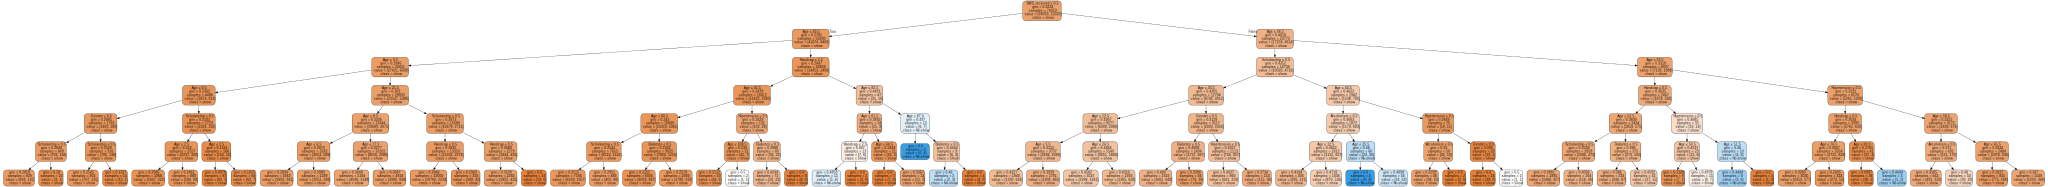

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=6, min_impurity_split=0.005)
clf.fit(train_x,train_y)
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=train_x.columns,
                         class_names=['show','No-show'],
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = graphviz.Source(dot_data)
graph

### Result Discussion:

First of all, we can see that both L2 and L1 regularization agreed upon the same features with minor differences in weights. However, the decision tree had a completely different take on it. As we can see Age was selected as the second split features which is very different from what logistic regression has predicted as both L1 and L2 gave age the lowest weights but in the decsion tree the age was given such importance as it was used as the second node and it was used multiple times. 
#Note in my case: I didn't have an equal distibution of the classes, close 85-15 distribution as we can see the decsion tree didn't do so well as we can some splits produce two nodes with the same class.
Also, one would notice that the handicap feature was given no weight in the L1 penelty which makes sense as the purpose of the L1 regulaization is to trim down features or weights of predictors wheras the l2 generally focused on minizing the weights but no elemenating one feature specifically. As just to minimize the weights of the largests. which is why we see lower weights in L2 compared to L1.

### Z-scoring the data:

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_x,train_y)
X_test = scaler.transform(test_x)

In [10]:
a = {}
a['X_train'] = train_x
a['y_train'] = train_y
a['X_test'] = test_x
a['y_test'] = test_y
a['target_names'] = ['No-show']
a['feature_names'] = data.drop('No-show', axis = 1).columns
import pickle
pickle.dump(a, open("aalsabbagh.pickle", "wb")) # replace username with your username

In [11]:
logreg = linear_model.LogisticRegression(penalty='l2')
logreg.fit(X_train,train_y)
features_weight = []
for i in range(len(data.columns.drop('No-show'))):
    features_weight.append((data.columns.drop('No-show')[i],logreg.coef_[0][i]))
features_weight.sort(key=lambda tup: abs(tup[1]), reverse=True)
for feature in features_weight:
    print(feature)

('SMS_received', 0.30848994780262246)
('Age', -0.14508377766589808)
('Scholarship', 0.065352842230096575)
('Hipertension', -0.020236588212063155)
('Alcoholism', 0.016324922805483907)
('Diabetes', 0.015102309593618624)
('Gender', -0.0030717205693598505)
('Handcap', -9.4551641766197893e-05)


In [12]:
logreg = linear_model.LogisticRegression(penalty='l1')
logreg.fit(X_train,train_y)
features_weight = []
for i in range(len(data.columns.drop('No-show'))):
    features_weight.append((data.columns.drop('No-show')[i],logreg.coef_[0][i]))
features_weight.sort(key=lambda tup: abs(tup[1]), reverse=True)
for feature in features_weight:
    print(feature)

('SMS_received', 0.30844296968042817)
('Age', -0.14501602145199646)
('Scholarship', 0.065301801766529374)
('Hipertension', -0.020097578734118715)
('Alcoholism', 0.016213219463037595)
('Diabetes', 0.014925286219269505)
('Gender', -0.0029780725459251853)
('Handcap', -1.2048731146371957e-05)


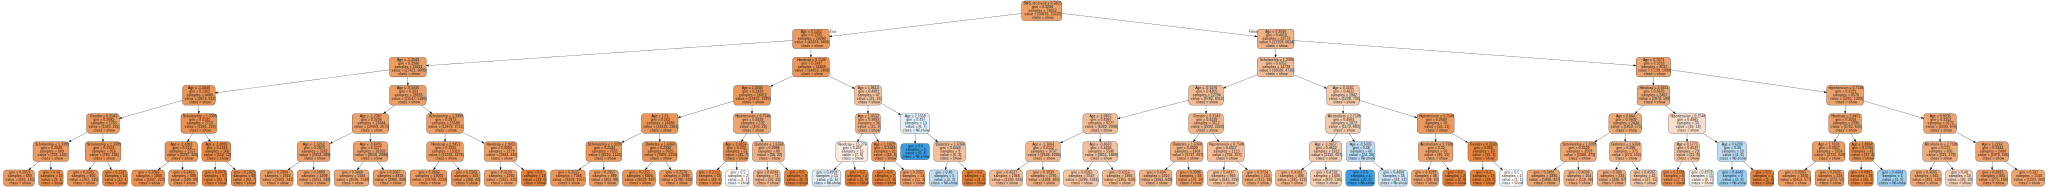

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=6, min_impurity_split=0.005)
clf.fit(X_train,train_y)
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=train_x.columns,
                         class_names=['show','No-show'],
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Discuss results:
Now After we have scaled the Data, The results we get from the L1,L2 penelty of the logistic regression agrees with what the decision tree produces, due to normalization of the dataset.As we see the age feature now has much higher weight than before and now it is the second most important features in both l1 and l2.
This result actually makes sense, asides from recieving a text message as the most important factor, it makes sense that ages will have an effect because as people get older then tend to require more assitance which increases the burden for a doctors visit, also older people are more forgetful so it the result is very logical.

## 5. Evidence:

In [23]:
logreg = linear_model.LogisticRegression(penalty='l2')
logreg.fit(X_train,train_y)
bias_weight = logreg.intercept_
predicted_prob = logreg.predict_proba(X_test)
features_weight = []
for i in range(len(data.columns.drop('No-show'))):
    features_weight.append((data.columns.drop('No-show')[i],logreg.coef_[0][i]))
for feature in features_weight:
    print(feature)

('Gender', -0.0030717205693598505)
('Age', -0.14508377766589808)
('Scholarship', 0.065352842230096575)
('Hipertension', -0.020236588212063155)
('Diabetes', 0.015102309593618624)
('Alcoholism', 0.016324922805483907)
('Handcap', -9.4551641766197893e-05)
('SMS_received', 0.30848994780262246)


In [24]:
def evidence_calc(obj):
    positive_log_evidence = []
    negative_log_evidence = []
    for i,feature_value in enumerate(obj):
        evidence = float(feature_value*features_weight[i][1])
        if evidence>0:
            positive_log_evidence.append((evidence,features_weight[i][0])) 
        else:
            negative_log_evidence.append((evidence,features_weight[i][0]))
    return(positive_log_evidence,negative_log_evidence)

def features_pos(pos,obj):
    pos.sort(key=lambda tup: tup[0],reverse=False)
    result=[]
    x=len(pos)
    if(x<1):
        return
    if(x>3):
        x = 3
    else:
        x=len(pos)
    for i in range(1,x+1):
        itemindex = np.where(data.columns==pos[-i][1])
        result.append((pos[-i][1],obj[itemindex][0]))
    return result
def features_neg(pos,obj):
    pos.sort(key=lambda tup: tup[0], reverse=True)
    result=[]
    x=len(pos)
    if(x>3):
        x = 3
    else:
        x=len(pos)
    for i in range(1,x+1):
        itemindex = np.where(data.columns==pos[-i][1])
        result.append((pos[-i][1],obj[itemindex][0]))
    return result

### 1.The most positive with respect to the probabilities.

In [25]:
index = np.argmin(predicted_prob[:,0])
obj = X_test[index,]
for i,val in enumerate(obj):
    print(data.columns[i], val)
print("total positive evidence= ",sum(i for i,_ in evidence_calc(obj)[0]))
print("total negative evidence= ",bias_weight+sum(i for i, _ in evidence_calc(obj)[1]))
print("top 3 features values that contribute most to the positive evidence ",features_pos(evidence_calc(obj)[0],obj))
print("top 3 features values that contribute most to the negative evidence ",features_neg(evidence_calc(obj)[1],obj))
print("probability distribution = ", predicted_prob[index])

Gender -0.733939860898
Age -1.6062298576
Scholarship 3.01183124212
Hipertension -0.49806650801
Diabetes -0.281296976802
Alcoholism -0.178071114804
Handcap -0.137624476819
SMS_received 1.45430547574
total positive evidence=  0.8908548854429135
total negative evidence=  [-1.4119123]
top 3 features values that contribute most to the positive evidence  [('SMS_received', 1.4543054757427454), ('Age', -1.6062298575967282), ('Scholarship', 3.0118312421150946)]
top 3 features values that contribute most to the negative evidence  [('Diabetes', -0.28129697680237165), ('Alcoholism', -0.17807111480427418)]
probability distribution =  [ 0.62739499  0.37260501]


### 2.The most negative with respect to the probabilities.

In [26]:
index = np.argmin(predicted_prob[:,1])
obj = X_test[index,]
for i,val in enumerate(obj):
    print(data.columns[i], val)
print("total positive evidence= ",sum(i for i,_ in evidence_calc(obj)[0]))
print("total negative evidence= ",bias_weight+sum(i for i, _ in evidence_calc(obj)[1]))
print("top 3 features values that contribute most to the positive evidence ",features_pos(evidence_calc(obj)[0],obj))
print("top 3 features values that contribute most to the negative evidence ",features_neg(evidence_calc(obj)[1],obj))
print("probability distribution = ", predicted_prob[index])

Gender -0.733939860898
Age 3.36669697588
Scholarship -0.332023914892
Hipertension -0.49806650801
Diabetes -0.281296976802
Alcoholism -0.178071114804
Handcap 6.02783552433
SMS_received -0.687613446198
total positive evidence=  0.012333624992221098
total negative evidence=  [-2.1347559]
top 3 features values that contribute most to the positive evidence  [('Hipertension', -0.49806650801045221), ('Gender', -0.73393986089794427)]
top 3 features values that contribute most to the negative evidence  [('Age', 3.3666969758775562), ('SMS_received', -0.68761344619793729), ('Scholarship', -0.33202391489163846)]
probability distribution =  [ 0.89306348  0.10693652]


In [27]:
pos_evidence_objects_list= []
neg_evidence_objects_list= []
for i in range(0,len(X_test)):
    pos_evidence_objects_list.append(bias_weight+sum(i for i, _ in evidence_calc(test_x.iloc[i])[0]))
    neg_evidence_objects_list.append(sum(i for i, _ in evidence_calc(test_x.iloc[i])[1]))
pos_evidence_objects_list = np.array(pos_evidence_objects_list)
neg_evidence_objects_list = np.array(neg_evidence_objects_list)

### 3. The object that has the largest positive evidence.

In [28]:
index = np.argmax(pos_evidence_objects_list)
obj = X_test[index,]
for i,val in enumerate(obj):
    print(data.columns[i], val)
print("total positive evidence= ",sum(i for i,_ in evidence_calc(obj)[0]))
print("total negative evidence= ",bias_weight+sum(i for i, _ in evidence_calc(obj)[1]))
print("top 3 features values that contribute most to the positive evidence ",features_pos(evidence_calc(obj)[0],obj))
print("top 3 features values that contribute most to the negative evidence ",features_neg(evidence_calc(obj)[1],obj))
print("probability distribution = ", predicted_prob[index])

Gender 1.36250945517
Age 0.728883612035
Scholarship 3.01183124212
Hipertension 2.00776399119
Diabetes 3.55496177516
Alcoholism 5.61573392237
Handcap -0.137624476819
SMS_received 1.45430547574
total positive evidence=  0.7908479210114933
total negative evidence=  [-1.5553218]
top 3 features values that contribute most to the positive evidence  [('SMS_received', 1.4543054757427454), ('Scholarship', 3.0118312421150946), ('Alcoholism', 5.6157339223666023)]
top 3 features values that contribute most to the negative evidence  [('Age', 0.728883612034675), ('Hipertension', 2.0077639911877281), ('Gender', 1.3625094551705403)]
probability distribution =  [ 0.68232427  0.31767573]


### 4. The object that has the largest (in magnitude) negative evidence.

In [29]:
index = np.argmin(neg_evidence_objects_list)
obj = X_test[index,]
for i,val in enumerate(obj):
    print(data.columns[i], val)
print("total positive evidence= ",sum(i for i,_ in evidence_calc(obj)[0]))
print("total negative evidence= ",bias_weight+sum(i for i, _ in evidence_calc(obj)[1]))
print("top 3 features values that contribute most to the positive evidence ",features_pos(evidence_calc(obj)[0],obj))
print("top 3 features values that contribute most to the negative evidence ",features_neg(evidence_calc(obj)[1],obj))
print("probability distribution = ", predicted_prob[index])

Gender -0.733939860898
Age 3.36669697588
Scholarship -0.332023914892
Hipertension -0.49806650801
Diabetes -0.281296976802
Alcoholism -0.178071114804
Handcap 6.02783552433
SMS_received -0.687613446198
total positive evidence=  0.012333624992221098
total negative evidence=  [-2.1347559]
top 3 features values that contribute most to the positive evidence  [('Hipertension', -0.49806650801045221), ('Gender', -0.73393986089794427)]
top 3 features values that contribute most to the negative evidence  [('Age', 3.3666969758775562), ('SMS_received', -0.68761344619793729), ('Scholarship', -0.33202391489163846)]
probability distribution =  [ 0.89306348  0.10693652]


### 5. The most uncertain object (the probabilities are closest to 0.5)

In [30]:
clearPRE = np.abs(np.add(predicted_prob[:,1],-0.5))
index = np.argmin(clearPRE)
obj = X_test[index,]
for i,val in enumerate(obj):
    print(data.columns[i], val)
print("total positive evidence= ",sum(i for i,_ in evidence_calc(obj)[0]))
print("total negative evidence= ",bias_weight+sum(i for i, _ in evidence_calc(obj)[1]))
print("top 3 features values that contribute most to the positive evidence ",features_pos(evidence_calc(obj)[0],obj))
print("top 3 features values that contribute most to the negative evidence ",features_neg(evidence_calc(obj)[1],obj))
print("probability distribution = ", predicted_prob[index])

Gender -0.733939860898
Age -1.6062298576
Scholarship 3.01183124212
Hipertension -0.49806650801
Diabetes -0.281296976802
Alcoholism -0.178071114804
Handcap -0.137624476819
SMS_received 1.45430547574
total positive evidence=  0.8908548854429135
total negative evidence=  [-1.4119123]
top 3 features values that contribute most to the positive evidence  [('SMS_received', 1.4543054757427454), ('Age', -1.6062298575967282), ('Scholarship', 3.0118312421150946)]
top 3 features values that contribute most to the negative evidence  [('Diabetes', -0.28129697680237165), ('Alcoholism', -0.17807111480427418)]
probability distribution =  [ 0.62739499  0.37260501]
